In [26]:
import pandas as pd
import pandasql as psql
import plotly.express as px

import nltk
from nltk.corpus import movie_reviews,stopwords
from nltk.tokenize import word_tokenize,RegexpTokenizer 
import enchant
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [20]:
def getCleanReviews(data,producto):
    consulta = """
        SELECT
            [reviews.text] as reviews
        FROM
            data
        WHERE
            id = '{0}'
    """.format(producto)
    
    reviews = psql.sqldf(consulta, locals())['reviews'].tolist()
    
    # Transformando a string
    
    txt = ''
    for value in reviews:
        txt += ' {0}'.format(value.lower())
    
    tokenizer = RegexpTokenizer(r'\w+')
    
    words = tokenizer.tokenize(txt)
    
    # Eliminamos Stop words del listado
    words = [w for w in words if not w in STOP_WORDS] 
    
    # Eliminamos numeros que se hayan tomado como palabras
    words = [x for x in words if not x.isdigit()]
    
    words = [x for x in words if SPELL.check(x)]
    
    return words

### Variables

Listado de Stop Words en el idioma ingles

In [3]:
STOP_WORDS = set(stopwords.words('english')) 

Diccionario de palabras en Ingles

In [6]:
SPELL = enchant.Dict("en_US") 

In [7]:
path = 'GrammarandProductReviews.csv'

In [8]:
DATA = pd.read_csv(path)

In [9]:
DATA['reviews.text'].head(1)

0    i love this album. it's very good. more to the...
Name: reviews.text, dtype: object

In [10]:
print("Cantidad de Productos: ", len(DATA.id.unique().tolist()) )

Cantidad de Productos:  600


In [11]:
consulta = """
    SELECT
         id as producto
        ,count([reviews.text]) as cantidad_reviews
    FROM
        DATA
    GROUP BY
        id
    ORDER BY
        count([reviews.text]) desc;
    """

In [12]:
consultado = psql.sqldf(consulta, locals()).head(10)

In [13]:
consultado

,producto,cantidad_reviews
0,AVpf3VOfilAPnD_xjpun,8606
1,AVpgOPJHLJeJML43KwSj,5510
2,AVpjDSAZLJeJML43rgNP,3609
3,AVph3agoilAPnD_x-Mv3,3498
4,AVpfPaoqLJeJML435Xk9,3330
5,AVphhorJilAPnD_x6cs7,2766
6,AVpgaPd61cnluZ0-1FvC,2489
7,AVpfW8y_LJeJML437ySW,2288
8,AVphoamL1cnluZ0-EojQ,2286
9,AVpfJP1C1cnluZ0-e3Xy,2093


In [14]:
fig = px.bar(x=consultado['producto'], y=consultado['cantidad_reviews'] ,text=consultado['cantidad_reviews'],title="Top 10 de Productos con más Reviews")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside',
                  marker_color='rgb(255,127,80)')#, marker_line_color='rgb(8,48,107)',
                  #marker_line_width=1.5, opacity=0.6)


fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide',xaxis_title="Producto",
    yaxis_title="Cantidad de Reviews",)
fig.show()

## Limpiando Reviews 

In [21]:
REVIEWS = getCleanReviews(DATA,'AVpf3VOfilAPnD_xjpun')

In [22]:
REVIEWS

['outstanding',
 'product',
 'cleans',
 'surfaces',
 'clean',
 'fresh',
 'smell',
 'use',
 'time',
 'avid']

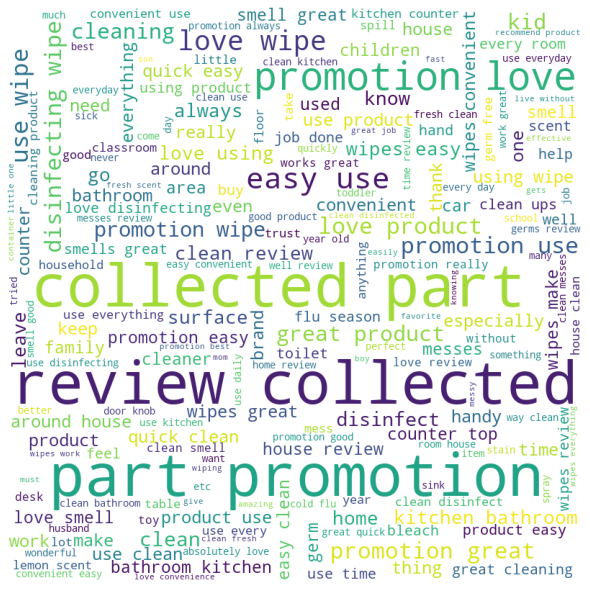

In [27]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in REVIEWS: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 